In [1]:
import zipfile
with zipfile.ZipFile('/root/Desktop/Titanic/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('/root/Desktop/Titanic')

In [2]:
import pandas as pd
df = pd.read_csv('test.csv')
print(df.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

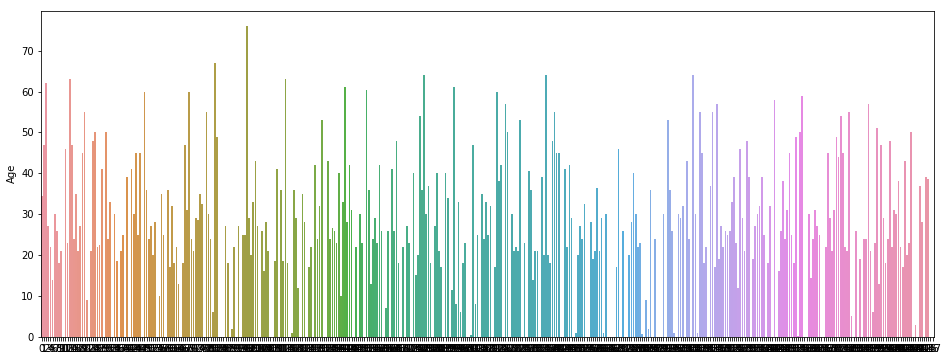

In [7]:
Age = df['Age']
plt.figure(figsize=(16, 6))
sns.barplot(x= df.index, y=Age)

In [10]:
print(df.shape)

(418, 11)


In [12]:
missing_val_count_by_column = df.isnull().sum()
print(missing_val_count_by_column)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [27]:
df=df.drop('Name', axis=1)
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print('Categorical variables')
print(object_cols)

Categorical variables
['Sex', 'Ticket', 'Embarked']


In [28]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))

OH_cols_train.index = df.index

num_X_train = df.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

In [29]:
print(df.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch   Ticket     Fare Embarked
0          892       3    male  34.5      0      0   330911   7.8292        Q
1          893       3  female  47.0      1      0   363272   7.0000        S
2          894       2    male  62.0      0      0   240276   9.6875        Q
3          895       3    male  27.0      0      0   315154   8.6625        S
4          896       3  female  22.0      1      1  3101298  12.2875        S


In [30]:
print(OH_X_train.head())

   PassengerId  Pclass   Age  SibSp  Parch     Fare    0    1    2    3  ...  \
0          892       3  34.5      0      0   7.8292  0.0  1.0  0.0  0.0  ...   
1          893       3  47.0      1      0   7.0000  1.0  0.0  0.0  0.0  ...   
2          894       2  62.0      0      0   9.6875  0.0  1.0  0.0  0.0  ...   
3          895       3  27.0      0      0   8.6625  0.0  1.0  0.0  0.0  ...   
4          896       3  22.0      1      1  12.2875  1.0  0.0  0.0  0.0  ...   

   358  359  360  361  362  363  364  365  366  367  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 374 columns]
